In [1]:
margarine_consumption = [5,4.7,4.6,4.4,4.3,4.1,4.2,4.2,4.2,4.1]
divorce_rate = [8.2,7,6.5,5.3,5.2,4,4.6,4.5,4.2,3.7]
years = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009]

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter

No handles with labels found to put in legend.


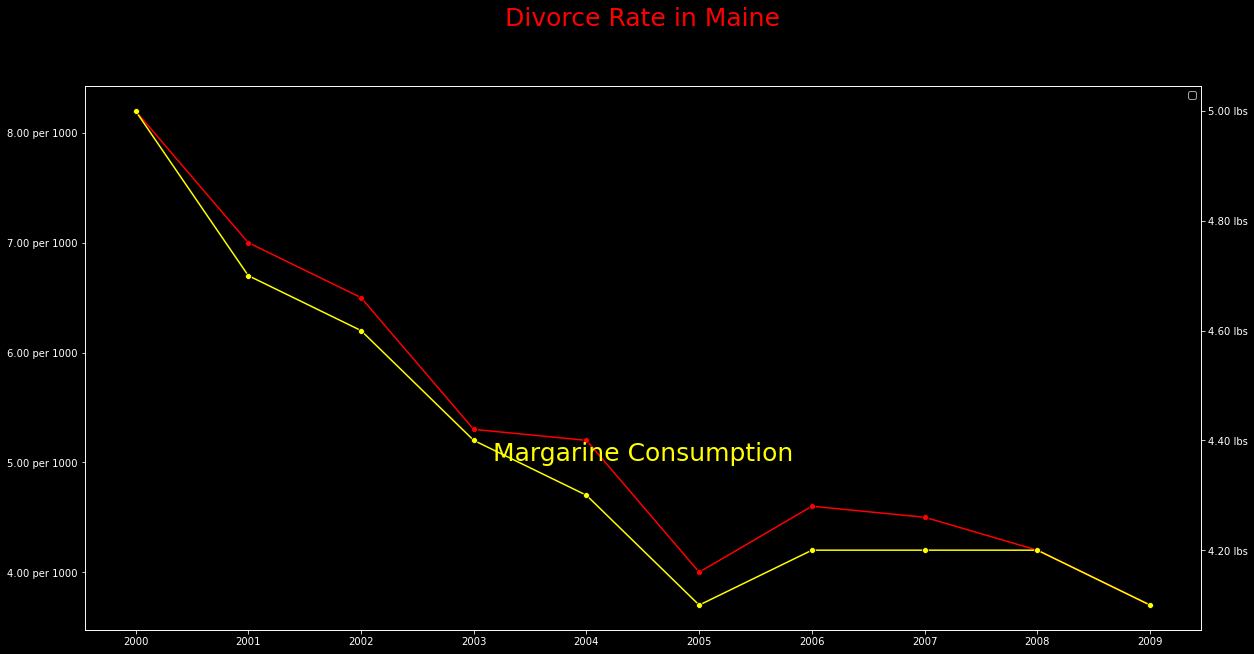

In [35]:
plt.figure(figsize=(20,10))

ax = plt.gca()
plt.style.use("dark_background")

chart = sns.lineplot(x=years,
                     y=divorce_rate,
                     linestyle='-', marker='o', color='red',
                     palette='bright',  markeredgecolor="black",   
                     ax=ax
                    )
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f per 1000'))

ax2 = chart.twinx()
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f lbs'))
chart = sns.lineplot(x=years,
                     y=margarine_consumption,
                     linestyle='-', marker='o', color="yellow",
                     palette='bright',  markeredgecolor="black",   
                    ax=ax2
                    )
ax.set_title("Margarine Consumption", loc='center', y=0.3, color = 'yellow', size=25)
handles, labels = chart.get_legend_handles_labels()
plt.legend(handles, labels, frameon=False, loc="best")
plt.xticks(years)
plt.legend(handles=handles, labels=["Margarine Consumption",'Divorce Rate in Maine' ])
plt.show();

Human problems won't be  solved by root mean square error." -
@drewconway